## Real State Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")


In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
 housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline


In [8]:
# to print histograms
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting


In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
      strat_train_set = housing.loc[train_index]
      strat_test_set = housing.loc[test_index]


In [14]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [15]:
# strat_train_set.describe()

In [16]:
housing = strat_train_set.copy()

## Looking For Correlations

In [17]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

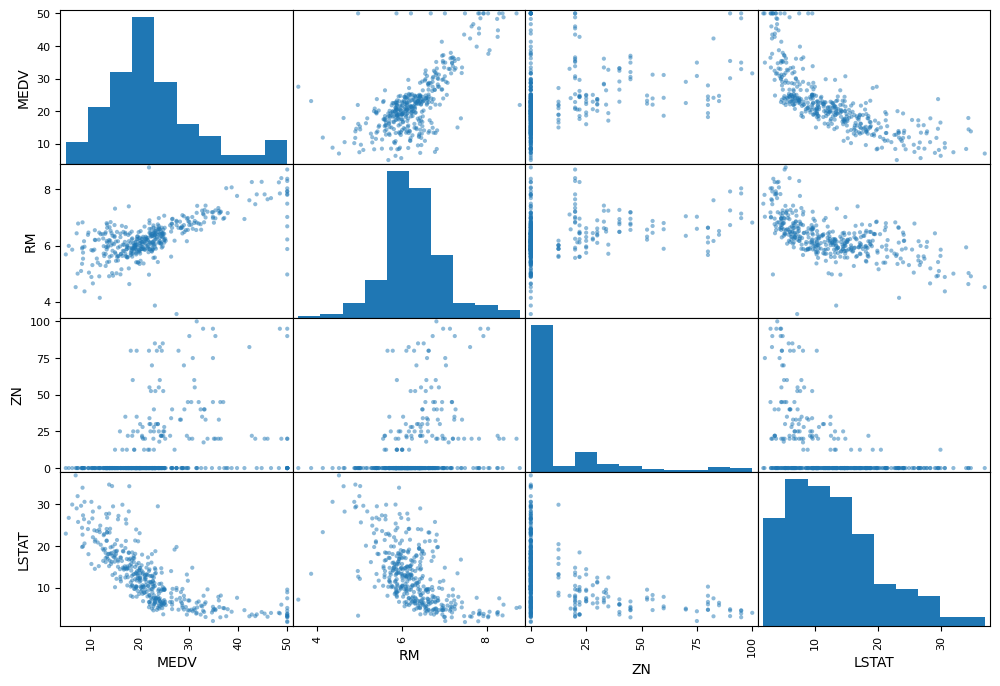

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

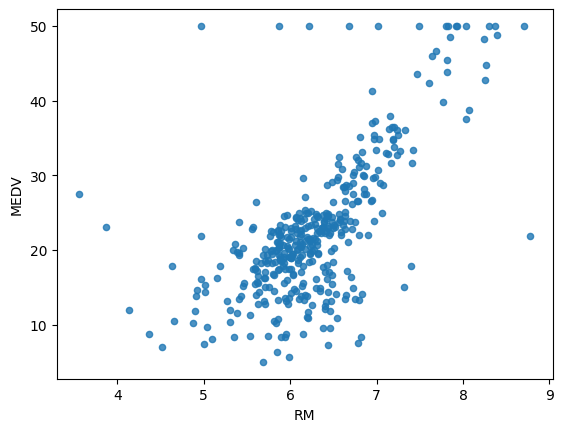

In [19]:
housing.plot(kind = "scatter", x = "RM", y = "MEDV", alpha=0.8)

In [20]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

 ## Missing Attributes
 

In [21]:
# to handle missing attribute we can have
# 1.remove those data points
# 2.remove the attribue itself
# 3.assign some values(0, mean , meadin)


In [22]:
a =housing.dropna(subset=["RM"]) #option1
a.shape
# orignal housing dataframe remains unchanged

(399, 13)

In [23]:
housing.drop("RM", axis=1).shape #option2
# orignal housing dataframe remains unchanged

(404, 12)

In [24]:
median = housing["RM"].median() #finding median

In [25]:
housing["RM"].fillna(median) #option3
# orignal housing dataframe remains unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [27]:
# Replace missing values with the median
housing_imputed = imputer.transform(housing)

In [28]:
# Convert back to a DataFrame if needed
housing_imputed = pd.DataFrame(housing_imputed, columns=housing.columns)

In [29]:
housing_imputed.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Feature Scaling

In [30]:
# Primarily, two types of feature scaling methods:
# 1. Min-Max scaling(Normalisation) => (value-min)(max-min)
#       sklearn provides a class called MinMaxScaler for this

# 2. Standardization
#       (value - mean)/std
#       sklearn provides a class called Standard Scaler for this

## Creating PipeLine

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                        ('std_scaler', StandardScaler())
                       ] )

In [32]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [33]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Real States

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model =  DecisionTreeRegressor()
#model =  LinearRegression()
model =  RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [35]:
somedata=housing.iloc[:5]

In [36]:
someLabels = housing_labels.iloc[:5]

In [37]:
prepared_data = my_pipeline.transform(somedata)

In [38]:
model.predict(prepared_data)

array([22.416, 25.252, 16.371, 23.341, 23.548])

In [39]:
list(someLabels)


[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [40]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [41]:
mse

1.5313723341584144

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [43]:
rmse_scores

array([2.89691792, 2.79092034, 4.47932244, 2.48699756, 3.40302636,
       2.75129973, 4.92328189, 3.34952052, 3.24138683, 3.28431427])

In [44]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation", scores.std())

In [45]:
print_scores(rmse_scores)

Scores: [2.89691792 2.79092034 4.47932244 2.48699756 3.40302636 2.75129973
 4.92328189 3.34952052 3.24138683 3.28431427]
Mean: 3.3606987872765886
Standard Deviation 0.7341275472204472


## Saving The Model

In [46]:
from joblib import dump, load
dump(model, 'RealState.joblib')

['RealState.joblib']

## Testing The Model On Test Data

In [51]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions)

[24.537 11.626 25.311 22.121 18.144 14.878 19.776 14.208 31.472 41.936
 19.694 11.292 23.822 28.177 19.588 10.413 31.386 14.359 23.527 18.537
 19.763 17.878 15.948 22.075 18.466 31.32  15.851 33.365  8.423 33.754
 24.145 21.165 23.409 11.246 21.105 11.426 43.688 24.269 23.907 41.321
 24.226 29.687 20.692 20.734 19.156 33.614 44.896 20.081 20.442 21.436
 20.895 14.465 21.217 14.784 24.888 32.751 42.482 29.237 19.532 20.776
 46.528  9.35  18.812 25.23  14.568 32.938 20.244 18.756 19.434 33.598
 24.777 23.274 21.569 22.585 34.632 13.269 16.327 19.958 20.736 21.254
 22.518 21.078 13.903 22.903 20.597 20.975 14.289 21.401 21.58  23.508
 19.077 27.156  7.24  26.318 19.275 29.634 19.81  31.157 14.422 27.113
 21.219 20.229]


In [52]:
final_rmse

np.float64(2.9014139487430572)

## Using The Model